# Diagnosing Cervical Cancer Using Logistical Regression
In this porject, we will be looking at risk factors used in predicting the likelihood of someone being diagnosed with cervical cancer. We will be using logistic regression to classify our data into 1 (has cancer) or 2 (does not). 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
cancer_df = pd.read_csv('Cervical_Cancer_Risk_Factors.csv')
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


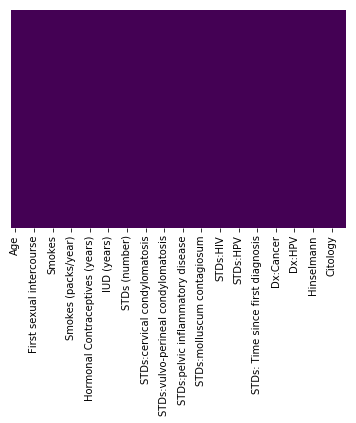

In [2]:
# Let's first look at the data to see if there is missing information -- this will appear as yellow
sns.heatmap(cancer_df.isnull(),yticklabels=False, cbar=False, cmap='viridis');

In [3]:
# At first our data looks good, but we will face issues with the spacing of the column names, so let's fix that
cancer_df.columns = cancer_df.columns.str.replace(' ', '_')
# In addition, the lack of blank vaues appears to be as a result of them having been filled with quesiton marks, let's handle that
cancer_df = cancer_df.replace('?',0)
# Two of our columns are missing so much information as to be less than useful
cancer_df = cancer_df.drop('STDs:_Time_since_first_diagnosis',axis=1)
cancer_df = cancer_df.drop('STDs:_Time_since_last_diagnosis',axis=1)
#print(cancer_df.columns.values)

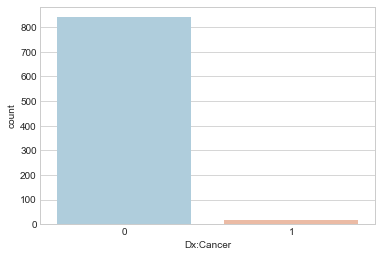

In [4]:
# Let's just have a look at our data to explore the proportion of people who really have the disease
sns.set_style('whitegrid')
sns.countplot(x='Dx:Cancer', data=cancer_df, palette='RdBu_r');

In [5]:
# Let's finally deoply our Logistic Regression model using sklearn 
X = cancer_df.drop('Dx:Cancer', axis=1)
y = cancer_df['Dx:Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       249
          1       1.00      0.33      0.50         9

avg / total       0.98      0.98      0.97       258



# Conclusions
Our model seems to work. Below are the results:

Precision: 98%

Recall: 98%

F1 Score: 97%